# Approximate Bayesian Computation

In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from torch.distributions.normal import Normal

## Observations

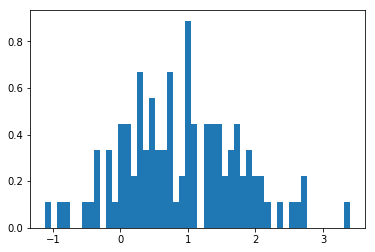

In [10]:
num_observations = 100
theta_true = 1.

N = Normal(theta_true, 1.)
observations = N.sample(torch.Size([num_observations])).view(-1, 1)

plt.hist(observations.numpy(), bins=50, density=True)
plt.show()

## Posterior inference with ABC

The forward model:

In [11]:
def forward_model(theta, num_samples=num_observations):
    with torch.no_grad():
        N = Normal(theta.item(), 1.)
        samples = N.sample(torch.Size([num_samples]))
        samples = samples.view(-1, 1)
        
    return samples

Summary statistic:

In [12]:
def summary(x):
    # Variance is kept static, mean is sufficient.
    return x.mean().detach()

Distance function:

In [13]:
def distance(x_a, x_b):
    d = (x_a - x_b).abs()
    return d

Approximate Bayesian Computation (ABC) procedure:

Sample mean: tensor(0.9110)


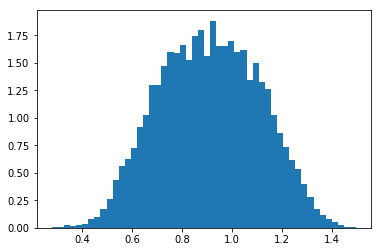

In [14]:
from hypothesis.inference import ApproximateBayesianComputation as ABC
from torch.distributions.uniform import Uniform

prior = Uniform(-3, 3)
epsilon = .3
abc = ABC(prior, forward_model, summary, distance, epsilon=epsilon)
samples = abc.infer(observations, samples=10000)
samples = torch.tensor(samples)

print("Sample mean:", samples.mean())
plt.hist(samples.numpy(), bins=50, density=True)
plt.show()

Sample mean: tensor(0.9127)


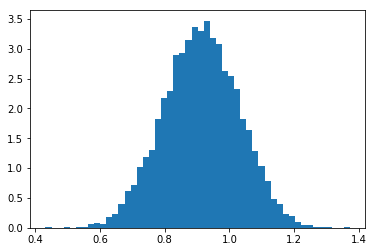

In [15]:
from hypothesis.inference import ApproximateBayesianComputation as ABC
from torch.distributions.uniform import Uniform

prior = Uniform(-3, 3)
epsilon = .1
abc = ABC(prior, forward_model, summary, distance, epsilon=epsilon)
samples = abc.infer(observations, samples=10000)
samples = torch.tensor(samples)

print("Sample mean:", samples.mean())
plt.hist(samples.numpy(), bins=50, density=True)
plt.show()

Sample mean: tensor(0.9118)


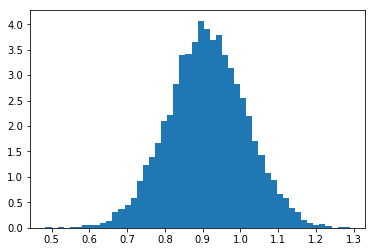

In [16]:
from hypothesis.inference import ApproximateBayesianComputation as ABC
from torch.distributions.uniform import Uniform

prior = Uniform(-3, 3)
epsilon = .05
abc = ABC(prior, forward_model, summary, distance, epsilon=epsilon)
samples = abc.infer(observations, samples=10000)
samples = torch.tensor(samples)

print("Sample mean:", samples.mean())
plt.hist(samples.numpy(), bins=50, density=True)
plt.show()